## TASK 2

#### import libraries and read data into dataframe

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("QVI_data.csv")
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 19.2+ MB


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 20.2+ MB


 #### Add a new month ID column in the data with the format yyyymm

In [6]:
# Extract the year and month from the 'DATE' column and format it as "yyyymm"
df['YEARMONTH'] = df['DATE'].dt.strftime('%Y%m')

# Display the DataFrame with the new 'YEARMONTH' column
df.head(10)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream,201812
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget,201812
7,1007,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget,201812
8,1009,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium,201811
9,1010,2018-09-09,1,10,51,Doritos Mexicana 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Mainstream,201809


Next, we define the measure calculations to use during the analysis.
  calculate for each store and month calculate total sales, number of customers, transactions per customer, chips per customer and the average price per unit.

In [7]:
# Assuming you have a DataFrame named 'data' with 'STORE_NUM', 'YEARMONTH', 'TOT_SALES', 'PROD_QTY', and 'PROD_NAME' columns

# Calculate total sales per store and month
total_sales = df.groupby(['STORE_NBR', 'YEARMONTH'])['TOT_SALES'].sum().reset_index()

# Calculate the number of customers per store and month (unique count of transactions)
num_customers = df.groupby(['STORE_NBR', 'YEARMONTH'])['TXN_ID'].nunique().reset_index()

# Calculate transactions per customer per store and month
transactions_per_customer = total_sales['TOT_SALES'] / num_customers['TXN_ID']

# Calculate chips per customer per store and month (assuming chips are identified by the 'PROD_NAME' column)
chips_per_customer = df[df['PROD_NAME'].str.contains('chips', case=False, na=False)].groupby(['STORE_NBR', 'YEARMONTH'])['PROD_QTY'].sum().reset_index()

# Calculate the average price per unit per store and month
avg_price_per_unit = total_sales['TOT_SALES'] / df.groupby(['STORE_NBR', 'YEARMONTH'])['PROD_QTY'].sum().reset_index()['PROD_QTY']

# Create a new DataFrame with all the calculated measures
measure_over_time = pd.DataFrame({
    'STORE_NBR': total_sales['STORE_NBR'],
    'YEARMONTH': total_sales['YEARMONTH'],
    'totSales': total_sales['TOT_SALES'],
    'nCustomers': num_customers['TXN_ID'],
    'nTxnPerCust': transactions_per_customer,
    'nChipsPerTxn': chips_per_customer['PROD_QTY'],
    'avgPricePerUnit': avg_price_per_unit
})

# Display the resulting DataFrame
print(measure_over_time.shape)
measure_over_time.head()

(3169, 7)


,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,52,3.978846,15.0,3.337097
1,1,201808,176.1,43,4.095349,7.0,3.261111
2,1,201809,278.8,62,4.496774,20.0,3.717333
3,1,201810,188.1,45,4.180000,11.0,3.243103
4,1,201811,192.6,47,4.097872,16.0,3.378947


#### Filter to the pre-trial period and stores with full observation

In [8]:
# Convert 'YEARMONTH' column to integer for comparison
measure_over_time['YEARMONTH'] = measure_over_time['YEARMONTH'].astype(int)

# Find stores with a full observation period (12 months)
stores_with_full_obs = measure_over_time.groupby('STORE_NBR')['YEARMONTH'].nunique() == 12
full_obs_stores = stores_with_full_obs[stores_with_full_obs].index.tolist()

# Filter to the pre-trial period (before February 2019) and stores with full observation periods
pre_trial_measures = measure_over_time[(measure_over_time['YEARMONTH'] < 201902) & (measure_over_time['STORE_NBR'].isin(full_obs_stores))]

# Display the resulting DataFrame
print(pre_trial_measures.shape)
pre_trial_measures.head()

(1820, 7)


,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,52,3.978846,15.0,3.337097
1,1,201808,176.1,43,4.095349,7.0,3.261111
2,1,201809,278.8,62,4.496774,20.0,3.717333
3,1,201810,188.1,45,4.180000,11.0,3.243103
4,1,201811,192.6,47,4.097872,16.0,3.378947


#### Create a function to calculate correlation for a measure, looping through each control store.
#### Create a function to calculate a standardised magnitude distance for a measure, looping through each control store
#### Use the function you created to calculate correlations and magnitude against store 77 using total sales and number of customers.

In [9]:
from scipy.stats import pearsonr

# Function to calculate correlation
def calculate_correlation(input_table, metric_col, store_comparison):
    calc_corr_table = pd.DataFrame(columns=['Store1', 'Store2', 'corr_measure'])
    store_numbers = input_table['STORE_NBR'].unique()

    for i in store_numbers:
        if i != store_comparison:
            trial_store_data = input_table[input_table['STORE_NBR'] == store_comparison][metric_col]
            control_store_data = input_table[input_table['STORE_NBR'] == i][metric_col]
            corr_measure, _ = pearsonr(trial_store_data, control_store_data)
            calculated_measure = pd.DataFrame({'trial_store_data': [store_comparison], 'control_store_data': [i], 'corr_measure': [corr_measure]})
            calculated_measure['Store1'] = [store_comparison]
            calculated_measure['Store2'] = [i]
            calculated_measure['corr_measure'] = [corr_measure]
            calc_corr_table = pd.concat([calc_corr_table, calculated_measure])

    return calc_corr_table


# Function to calculate magnitude distance
def calculate_magnitude_distance(input_table, metric_col, store_comparison):
    magnitude_table = pd.DataFrame(columns=["Store1", "Store2", "YEARMONTH", "magnitude_measure"])
    store_numbers = input_table["STORE_NBR"].unique()
    
    for i in store_numbers:
        magnitude_measure = pd.DataFrame({
            "Store1": [store_comparison],
            "Store2": [i],
            "YEARMONTH": input_table[input_table["STORE_NBR"] == store_comparison]["YEARMONTH"].values[0],
            "magnitude_measure": abs(input_table[(input_table["STORE_NBR"] == store_comparison)][metric_col].values[0]
                            - input_table[input_table["STORE_NBR"] == i][metric_col].values[0])
        })
        magnitude_table = pd.concat([magnitude_table, magnitude_measure], ignore_index=True)
    
    # Standardize the magnitude distance
    min_max_dist = magnitude_table.groupby(["Store1", "YEARMONTH"])["magnitude_measure"].agg(["min", "max"]).reset_index()
    dist_table = magnitude_table.merge(min_max_dist, on=["Store1", "YEARMONTH"])
    dist_table["magnitudeMeasure"] = 1 - (dist_table["magnitude_measure"] - dist_table["min"]) / (dist_table["max"] - dist_table["min"])
    
    final_dist_table = dist_table.groupby(["Store1", "Store2"])["magnitudeMeasure"].mean().reset_index()
    final_dist_table.rename(columns={"magnitudeMeasure": "mag_measure"}, inplace=True)
    
    return final_dist_table

# Trial store and metric column
trial_store = 77
metric_col_sales = 'totSales'
metric_col_customers = 'nCustomers'

# Calculate correlations for total sales and number of customers
corr_nSales = calculate_correlation(pre_trial_measures, metric_col_sales, trial_store)
corr_nCustomers = calculate_correlation(pre_trial_measures, metric_col_customers, trial_store)

# Calculate magnitude distances for total sales and number of customers
magnitude_nSales = calculate_magnitude_distance(pre_trial_measures, metric_col_sales, trial_store)
magnitude_nCustomers = calculate_magnitude_distance(pre_trial_measures, metric_col_customers, trial_store)

# Display the resulting DataFrames
print("Correlation for Total Sales:")
print(corr_nSales)

print("Correlation for Number of Customers:")
print(corr_nCustomers)

print("Magnitude Distance for Total Sales:")
print(magnitude_nSales)

print("Magnitude Distance for Number of Customers:")
print(magnitude_nCustomers)


Correlation for Total Sales:
   Store1 Store2  corr_measure  trial_store_data  control_store_data
0      77      1      0.075218              77.0                 1.0
0      77      2     -0.263079              77.0                 2.0
0      77      3      0.806644              77.0                 3.0
0      77      4     -0.263300              77.0                 4.0
0      77      5     -0.110652              77.0                 5.0
..    ...    ...           ...               ...                 ...
0      77    268      0.344757              77.0               268.0
0      77    269     -0.315730              77.0               269.0
0      77    270      0.315430              77.0               270.0
0      77    271      0.355487              77.0               271.0
0      77    272      0.117622              77.0               272.0

[259 rows x 5 columns]
Correlation for Number of Customers:
   Store1 Store2  corr_measure  trial_store_data  control_store_data
0      77    

#### Create a combined score composed of correlation and magnitude, by first merging the correlations table with the magnitude table.

In [10]:
# Merge correlations and magnitude tables for sales
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'], how='inner')

# Calculate the final score for total sales as the simple average
score_nSales['scoreNSales'] = (score_nSales['corr_measure'] + score_nSales['mag_measure']) / 2

# Merge correlations and magnitude tables for customers
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'], how='inner')

# Calculate the final score for number of customers as the simple average
score_nCustomers['scoreNCust'] = (score_nCustomers['corr_measure'] + score_nCustomers['mag_measure']) / 2

# Sort the scores for total sales in descending order
score_nSales = score_nSales.sort_values(by='scoreNSales', ascending=False)

# Display the sorted scores for total sales
print("Sorted Scores for Total Sales:")
print(score_nSales)

# Sort the scores for number of customers in descending order
score_nCustomers = score_nCustomers.sort_values(by='scoreNCust', ascending=False)

# Display the sorted scores for number of customers
print("Sorted Scores for Number of Customers:")
print(score_nCustomers)


Sorted Scores for Total Sales:
    Store1 Store2  corr_measure  trial_store_data  control_store_data  \
220     77    233      0.903774              77.0               233.0   
46      77     50      0.763866              77.0                50.0   
38      77     41      0.783232              77.0                41.0   
15      77     17      0.842668              77.0                17.0   
107     77    115      0.689159              77.0               115.0   
..     ...    ...           ...               ...                 ...   
22      77     24     -0.718112              77.0                24.0   
234     77    247     -0.631050              77.0               247.0   
3       77      4     -0.263300              77.0                 4.0   
51      77     55     -0.666782              77.0                55.0   
71      77     75     -0.806751              77.0                75.0   

     mag_measure  scoreNSales  
220     0.995415     0.949595  
46      0.986771     0.87531

#### Combine scores across the drivers by first merging our sales scores and customer scores into a single table

In [11]:
# Merge sales and customer scores into a single table
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'], how='inner')

# Calculate the final control store score as a weighted average (0.5 for each score)
score_Control['finalControlScore'] = 0.5 * score_Control['scoreNSales'] + 0.5 * score_Control['scoreNCust']

# Sort the stores by final control score in descending order
score_Control = score_Control.sort_values(by='finalControlScore', ascending=False)

# Display the sorted control store scores
print("Sorted Control Store Scores:")
score_Control.head()


Sorted Control Store Scores:


,Store1,Store2,corr_measure_x,trial_store_data_x,control_store_data_x,mag_measure_x,scoreNSales,corr_measure_y,trial_store_data_y,control_store_data_y,mag_measure_y,scoreNCust,finalControlScore
0,77,233,0.903774,77.0,233.0,0.995415,0.949595,0.958422,77.0,233.0,0.992248,0.975335,0.962465
2,77,41,0.783232,77.0,41.0,0.939567,0.861399,0.843928,77.0,41.0,0.961240,0.902584,0.881992
3,77,17,0.842668,77.0,17.0,0.858013,0.850340,0.808263,77.0,17.0,0.984496,0.896379,0.873360
4,77,115,0.689159,77.0,115.0,0.953322,0.821241,0.768323,77.0,115.0,0.992248,0.880286,0.850763
5,77,167,0.657110,77.0,167.0,0.954525,0.805818,0.678943,77.0,167.0,1.000000,0.839471,0.822645


The store with the highest score is then selected as the control store since it is most similar to the trial store.

#### Select control stores based on the highest matching store (closest to 1 but 
#### not the store itself, i.e. the second ranked highest store)
#### Select the most appropriate control store for trial store 77 by finding the store with the highest final score.

In [12]:
# Filter the scores for the trial store
trial_store_scores = score_Control[score_Control['Store1'] == trial_store]

# Sort the scores in descending order
trial_store_scores = trial_store_scores.sort_values(by='finalControlScore', ascending=False)

# Select the second highest ranked store (closest to 1 but not the store itself)
control_store = trial_store_scores.iloc[0]['Store2']

# Display the selected control store
print("Selected Control Store:", control_store)


Selected Control Store: 233


Now that we have found a control store, let’s check visually if the drivers are indeed similar in the period
before the trial. We’ll look at total sales first.


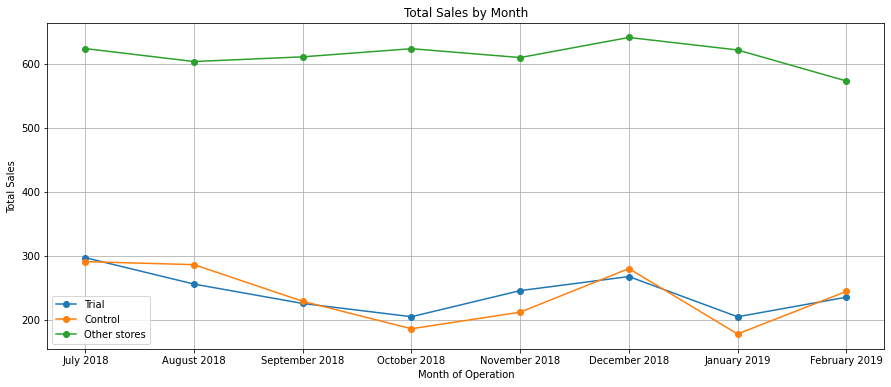

In [13]:
# Create a new DataFrame with store types
measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Calculate the mean total sales by month and store type
pastSales = measure_over_time.groupby(['YEARMONTH', 'Store_type'])['totSales'].mean().reset_index()

# Convert YEARMONTH to TransactionMonth as a date
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format='%Y%m')

# Convert TransactionMonth to "Month Year" format
pastSales['TransactionMonth'] = pastSales['TransactionMonth'].dt.strftime('%B %Y')

# Filter data for months before March 2019
pastSales = pastSales[pastSales['YEARMONTH'] < 201903]

# Create a line plot
plt.figure(figsize=(15, 6))
plt.plot(pastSales[pastSales['Store_type'] == 'Trial']['TransactionMonth'], pastSales[pastSales['Store_type'] == 'Trial']['totSales'], label='Trial', marker='o')
plt.plot(pastSales[pastSales['Store_type'] == 'Control']['TransactionMonth'], pastSales[pastSales['Store_type'] == 'Control']['totSales'], label='Control', marker='o')
plt.plot(pastSales[pastSales['Store_type'] == 'Other stores']['TransactionMonth'], pastSales[pastSales['Store_type'] == 'Other stores']['totSales'], label='Other stores', marker='o')

# Set labels and title
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Next, number of customers,

#### Conduct visual checks on customer count trends by comparing the trial store to the control store and other stores.                         

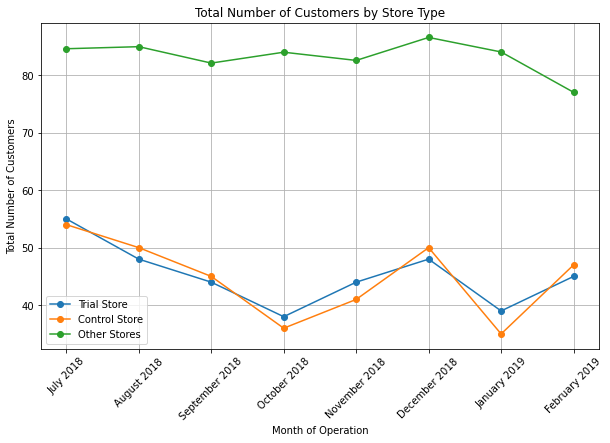

In [15]:
# Create a 'Store_type' column based on trial_store and control_store
measure_over_time['Store_type'] = measure_over_time['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)

# Calculate the mean number of customers by YEARMONTH and Store_type
pastCustomers = measure_over_time.groupby(['YEARMONTH', 'Store_type'])['nCustomers'].mean().reset_index()

# Filter data for months before March 2019
pastCustomers = pastCustomers[pastCustomers['YEARMONTH'] < 201903]

# Convert YEARMONTH to a date format
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'], format='%Y%m')

# Convert TransactionMonth to "Month Year" format
pastCustomers['TransactionMonth'] = pastCustomers['TransactionMonth'].dt.strftime('%B %Y')

# Plot customer count trends
plt.figure(figsize=(10, 6))
plt.plot(pastCustomers[pastCustomers['Store_type'] == 'Trial']['TransactionMonth'],
         pastCustomers[pastCustomers['Store_type'] == 'Trial']['nCustomers'], label='Trial Store', marker='o')
plt.plot(pastCustomers[pastCustomers['Store_type'] == 'Control']['TransactionMonth'],
         pastCustomers[pastCustomers['Store_type'] == 'Control']['nCustomers'], label='Control Store', marker='o')
plt.plot(pastCustomers[pastCustomers['Store_type'] == 'Other stores']['TransactionMonth'],
         pastCustomers[pastCustomers['Store_type'] == 'Other stores']['nCustomers'], label='Other Stores', marker='o')

plt.xlabel('Month of Operation')
plt.ylabel('Total Number of Customers')
plt.title('Total Number of Customers by Store Type')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

The trial period goes from the start of February 2019 to April 2019. We now want to see if there has been an uplift in overall chip sales. 
We'll start with scaling the control store's sales to a level similar to control for any differences between the two stores outside of the trial period.

#### Scale pre-trial control sales to match pre-trial trial store sales 

In [16]:
# Calculate the scaling factor for control store sales
trial_store_sales = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum()
control_store_sales = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum()

scaling_factor = trial_store_sales / control_store_sales

# Apply the scaling factor
measure_over_time_sales = measure_over_time
scaledControlSales = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scaling_factor

Now that we have comparable sales figures for the control store, we can calculate the percentage difference
between the scaled control sales and the trial store’s sales during the trial period.

#### Calculate the percentage difference between scaled control sales and trial sales

In [18]:
#  Merge the DataFrames on 'YEARMONTH' column
merged_sales = pd.merge(scaledControlSales[['YEARMONTH', 'controlSales']], measure_over_time[measure_over_time['STORE_NBR'] == trial_store][['YEARMONTH', 'totSales']], on='YEARMONTH')

# Calculate the percentage difference
merged_sales['percentageDiff'] = abs(merged_sales['controlSales'] - merged_sales['totSales']) / merged_sales['controlSales']

merged_sales.head()

,YEARMONTH,controlSales,totSales,percentageDiff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516


Let's see if the difference is significant!

#### As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period 

In [19]:
# Get the percentageDiff DataFrame for the pre-trial period
pre_trial_percentage_df = merged_sales[['percentageDiff','YEARMONTH']]

In [20]:
# Filter the percentageDiff DataFrame for the pre-trial period
pre_trial_percentage_diff = pre_trial_percentage_df[pre_trial_percentage_df['YEARMONTH'] < 201902]

# Calculate the standard deviation
std_dev = np.std(pre_trial_percentage_diff['percentageDiff'])
std_dev

0.046236161851401746

#### Note that there are 8 months in the pre-trial period 
#### hence 8 - 1 = 7 degrees of freedom

In [21]:
# Number of data points
n = 8

# Degrees of freedom
degrees_of_freedom = n - 1
degrees_of_freedom

7

#### We will test with a null hypothesis of there being 0 difference between trial and control stores.
#### Calculate the t-values for the trial months. After that, find the 95th percentile of the t distribution with the appropriate degrees of freedom
#### to check whether the hypothesis is statistically significant.

In [22]:
percentageDiff = merged_sales[['percentageDiff','YEARMONTH', 'totSales','controlSales']]

In [23]:
from scipy.stats import t

# Calculate the standard deviation based on the scaled percentage difference in the pre-trial period
std_dev = np.std(percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'])

# Degrees of freedom (number of months in the pre-trial period - 1)
degrees_of_freedom = 7

# Calculate the t-values for the trial months
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / std_dev
percentageDiff['TransactionMonth'] = pd.to_datetime(percentageDiff['YEARMONTH'].astype(str), format='%Y%m')

# Filter for the trial months
trial_months = percentageDiff[(percentageDiff['YEARMONTH'] < 201905) & (percentageDiff['YEARMONTH'] > 201901)]

# Find the 95th percentile of the t-distribution
alpha = 0.05  # Significance level
t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

print("Critical t-value for a 95% confidence interval:", t_critical)
print(trial_months[['TransactionMonth', 'tValue']])


C:\Users\DELL\AppData\Local\Temp/ipykernel_1980/1941313700.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / std_dev
C:\Users\DELL\AppData\Local\Temp/ipykernel_1980/1941313700.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentageDiff['TransactionMonth'] = pd.to_datetime(percentageDiff['YEARMONTH'].astype(str), format='%Y%m')


Critical t-value for a 95% confidence interval: 2.3646242510102993
  TransactionMonth     tValue
7       2019-02-01   1.278363
8       2019-03-01   7.927151
9       2019-04-01  13.476023


We can observe that the t-value is much larger than the 95th percentile value of
the t-distribution for March and April - i.e. the increase in sales in the trial
store in March and April is statistically greater than in the control store.

Let's create a more visual version of this by plotting the sales of the control
store, the sales of the trial stores and the 95th percentile value of sales of the
control store.

In [37]:
# Create a new column Store_type
measure_over_time['Store_type'] = 'Other stores'
measure_over_time.loc[measure_over_time['STORE_NBR'] == trial_store, 'Store_type'] = 'Trial'
measure_over_time.loc[measure_over_time['STORE_NBR'] == control_store, 'Store_type'] = 'Control'

# Calculate mean total sales by YEARMONTH and Store_type
pastSales = measure_over_time[measure_over_time['Store_type'].isin(['Trial', 'Control'])]
pastSales = pastSales.groupby(['YEARMONTH', 'Store_type'])['totSales'].mean().reset_index()

# Convert YEARMONTH to TransactionMonth
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'], format='%Y%m')

stdDev = np.std(percentageDiff[percentageDiff['YEARMONTH'] < 201902]['percentageDiff'])
# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Update 'Store_type' for 95th and 5th percentiles
pastSales.loc[pastSales['Store_type'] == 'Control', 'Store_type'] = 'Control 95th % confidence interval'
pastSales.loc[pastSales['Store_type'] == 'Control 5th % confidence interval', 'Store_type'] = 'Control 5th % confidence interval'

# Concatenate the DataFrames
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5], ignore_index=True)

# Filter the data for the specified date range
filtered_data = trialAssessment[(trialAssessment['TransactionMonth'] >= '2019-01-01') & (trialAssessment['TransactionMonth'] < '2019-05-01')]

# Convert TransactionMonth to "Month Year" format
filtered_data.loc[:, 'TransactionMonth'] = filtered_data['TransactionMonth'].dt.strftime('%B %Y')

Create a plot

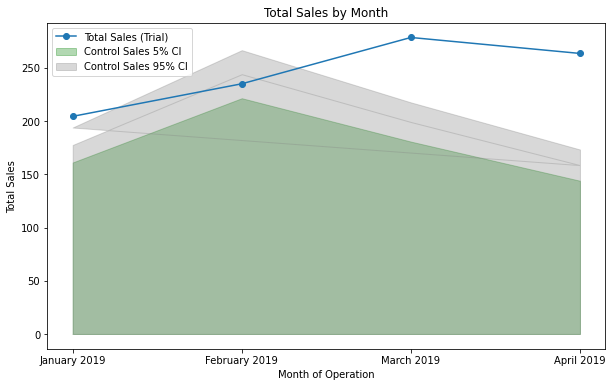

In [40]:
plt.figure(figsize=(10, 6))
#plt.plot(filtered_data['TransactionMonth'], filtered_data['totSales'], label='Total Sales', marker='o')
for store_type, data in filtered_data.groupby('Store_type'):
    if store_type == 'Trial':
        plt.plot(data['TransactionMonth'], data['totSales'], marker='o', label='Total Sales (Trial)')
    elif store_type == 'Control':
        plt.plot(data['TransactionMonth'], data['totSales'], marker='o', label='Total Sales (Control)')
    elif store_type == 'Control 95th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['totSales'], alpha=0.3, color='gray', label='Control Sales 95% CI')
    elif store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['totSales'], alpha=0.3, color='green', label='Control Sales 5% CI')
    else:
        plt.plot(data['TransactionMonth'], data['totSales'], label=f'Total Sales ({store_type})')

plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.legend()
plt.show()


The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trialmonths.

Let's have a look at assessing this for number of customers as well.

#### This would be a repeat of the steps before for total sales
#### Scale pre-trial control customers to match pre-trial trial store customers
#### Over to you! Compute a scaling factor to align control store customer counts to our trial store.
#### Then, apply the scaling factor to control store customer counts.
#### Finally, calculate the percentage difference between scaled control store customers and trial customers.

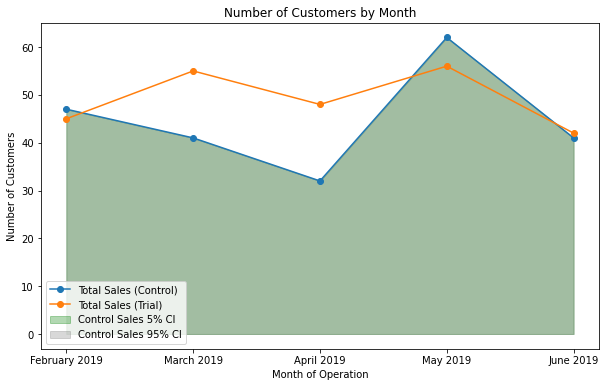

In [39]:
# Compute a scaling factor to align control store customer counts to the trial store
scalingFactorForControlCust = measure_over_time[measure_over_time['STORE_NBR'] == trial_store]['nCustomers'].sum() / measure_over_time[measure_over_time['STORE_NBR'] == control_store]['nCustomers'].sum()

# Apply the scaling factor to control store customer counts
measure_over_time['scaledControlCustomers'] = measure_over_time['nCustomers'] * scalingFactorForControlCust

# Calculate the percentage difference between scaled control store customers and trial customers
measure_over_time['percentageDiff'] = abs(measure_over_time['scaledControlCustomers'] - measure_over_time['nCustomers']) / measure_over_time['scaledControlCustomers']

# Standard deviation based on the scaled percentage difference in the pre-trial period
stdDev = measure_over_time[measure_over_time['YEARMONTH'] < 201902]['percentageDiff'].std()

# Degrees of freedom
degreesOfFreedom = 7

# Trial and control store number of customers
pastCustomers = measure_over_time[measure_over_time['Store_type'].isin(['Trial', 'Control'])]
pastCustomers = pastCustomers.groupby(['YEARMONTH', 'Store_type'])['nCustomers'].mean().reset_index()

pastCustomers['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'], format='%Y%m')

# Control store 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCustomers'] = pastCustomers_Controls95['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCustomers'] = pastCustomers_Controls5['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Concatenate the DataFrames
trialCusAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5], ignore_index=True)

# Filter the data for the specified date range
filtered_Cus_data = trialCusAssessment[(trialCusAssessment['TransactionMonth'] >= '2019-02-01')] 
                                    
filtered_Cus_data.loc[:, 'TransactionMonth'] = filtered_Cus_data['TransactionMonth'].dt.strftime('%B %Y')

plt.figure(figsize=(10, 6))
for store_type, data in filtered_Cus_data.groupby('Store_type'):
    if store_type == 'Trial':
        plt.plot(data['TransactionMonth'], data['nCustomers'], marker='o', label='Total Sales (Trial)')
    elif store_type == 'Control':
        plt.plot(data['TransactionMonth'], data['nCustomers'], marker='o', label='Total Sales (Control)')
    elif store_type == 'Control 95th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['nCustomers'], alpha=0.3, color='gray', label='Control Sales 95% CI')
    elif store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['nCustomers'], alpha=0.3, color='green', label='Control Sales 5% CI')
    else:
        plt.plot(data['TransactionMonth'], data['nCustomers'], label=f'Total Sales ({store_type})')

plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Month')
plt.legend()
plt.show()


Let's repeat finding the control store and assessing the impact of the trial for
each of the other two trial stores. 

## Trial store 86

In [41]:
from scipy.stats import pearsonr

# Function to calculate correlation
def calculate_correlation(input_table, metric_col, store_comparison):
    calc_corr_table = pd.DataFrame(columns=['Store1', 'Store2', 'corr_measure'])
    store_numbers = input_table['STORE_NBR'].unique()

    for i in store_numbers:
        if i != store_comparison:
            trial_store_data = input_table[input_table['STORE_NBR'] == store_comparison][metric_col]
            control_store_data = input_table[input_table['STORE_NBR'] == i][metric_col]
            corr_measure, _ = pearsonr(trial_store_data, control_store_data)
            calculated_measure = pd.DataFrame({'trial_store_data': [store_comparison], 'control_store_data': [i], 'corr_measure': [corr_measure]})
            calculated_measure['Store1'] = [store_comparison]
            calculated_measure['Store2'] = [i]
            calculated_measure['corr_measure'] = [corr_measure]
            calc_corr_table = pd.concat([calc_corr_table, calculated_measure])

    return calc_corr_table


# Function to calculate magnitude distance
def calculate_magnitude_distance(input_table, metric_col, store_comparison):
    magnitude_table = pd.DataFrame(columns=["Store1", "Store2", "YEARMONTH", "magnitude_measure"])
    store_numbers = input_table["STORE_NBR"].unique()
    
    for i in store_numbers:
        magnitude_measure = pd.DataFrame({
            "Store1": [store_comparison],
            "Store2": [i],
            "YEARMONTH": input_table[input_table["STORE_NBR"] == store_comparison]["YEARMONTH"].values[0],
            "magnitude_measure": abs(input_table[(input_table["STORE_NBR"] == store_comparison)][metric_col].values[0]
                            - input_table[input_table["STORE_NBR"] == i][metric_col].values[0])
        })
        magnitude_table = pd.concat([magnitude_table, magnitude_measure], ignore_index=True)
    
    # Standardize the magnitude distance
    min_max_dist = magnitude_table.groupby(["Store1", "YEARMONTH"])["magnitude_measure"].agg(["min", "max"]).reset_index()
    dist_table = magnitude_table.merge(min_max_dist, on=["Store1", "YEARMONTH"])
    dist_table["magnitudeMeasure"] = 1 - (dist_table["magnitude_measure"] - dist_table["min"]) / (dist_table["max"] - dist_table["min"])
    
    final_dist_table = dist_table.groupby(["Store1", "Store2"])["magnitudeMeasure"].mean().reset_index()
    final_dist_table.rename(columns={"magnitudeMeasure": "mag_measure"}, inplace=True)
    
    return final_dist_table

# Trial store and metric column
trial_store = 86
metric_col_sales = 'totSales'
metric_col_customers = 'nCustomers'

# Calculate correlations for total sales and number of customers
corr_nSales = calculate_correlation(pre_trial_measures, metric_col_sales, trial_store)
corr_nCustomers = calculate_correlation(pre_trial_measures, metric_col_customers, trial_store)

# Calculate magnitude distances for total sales and number of customers
magnitude_nSales = calculate_magnitude_distance(pre_trial_measures, metric_col_sales, trial_store)
magnitude_nCustomers = calculate_magnitude_distance(pre_trial_measures, metric_col_customers, trial_store)

# Display the resulting DataFrames
print("Correlation for Total Sales:")
print(corr_nSales)

print("Correlation for Number of Customers:")
print(corr_nCustomers)

print("Magnitude Distance for Total Sales:")
print(magnitude_nSales)

print("Magnitude Distance for Number of Customers:")
print(magnitude_nCustomers)


Correlation for Total Sales:
   Store1 Store2  corr_measure  trial_store_data  control_store_data
0      86      1      0.445632              86.0                 1.0
0      86      2     -0.403835              86.0                 2.0
0      86      3     -0.261284              86.0                 3.0
0      86      4     -0.039035              86.0                 4.0
0      86      5      0.235159              86.0                 5.0
..    ...    ...           ...               ...                 ...
0      86    268     -0.452182              86.0               268.0
0      86    269      0.697055              86.0               269.0
0      86    270     -0.730679              86.0               270.0
0      86    271      0.527637              86.0               271.0
0      86    272      0.004926              86.0               272.0

[259 rows x 5 columns]
Correlation for Number of Customers:
   Store1 Store2  corr_measure  trial_store_data  control_store_data
0      86    

In [42]:
# Merge correlations and magnitude tables for sales
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'], how='inner')

# Calculate the final score for total sales as the simple average
score_nSales['scoreNSales'] = (score_nSales['corr_measure'] + score_nSales['mag_measure']) / 2

# Merge correlations and magnitude tables for customers
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'], how='inner')

# Calculate the final score for number of customers as the simple average
score_nCustomers['scoreNCust'] = (score_nCustomers['corr_measure'] + score_nCustomers['mag_measure']) / 2

# Sort the scores for total sales in descending order
score_nSales = score_nSales.sort_values(by='scoreNSales', ascending=False)

# Display the sorted scores for total sales
print("Sorted Scores for Total Sales:")
print(score_nSales)

# Sort the scores for number of customers in descending order
score_nCustomers = score_nCustomers.sort_values(by='scoreNCust', ascending=False)

# Display the sorted scores for number of customers
print("Sorted Scores for Number of Customers:")
print(score_nCustomers)


Sorted Scores for Total Sales:
    Store1 Store2  corr_measure  trial_store_data  control_store_data  \
146     86    155      0.877882              86.0               155.0   
101     86    109      0.788300              86.0               109.0   
209     86    222      0.795075              86.0               222.0   
129     86    138      0.759864              86.0               138.0   
106     86    114      0.734415              86.0               114.0   
..     ...    ...           ...               ...                 ...   
47      86     51     -0.736441              86.0                51.0   
240     86    254     -0.793506              86.0               254.0   
39      86     42     -0.745720              86.0                42.0   
111     86    120     -0.872693              86.0               120.0   
137     86    146     -0.775127              86.0               146.0   

     mag_measure  scoreNSales  
146     0.963431     0.920656  
101     0.990745     0.88952

In [43]:
# Merge sales and customer scores into a single table
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'], how='inner')

# Calculate the final control store score as a weighted average (0.5 for each score)
score_Control['finalControlScore'] = 0.5 * score_Control['scoreNSales'] + 0.5 * score_Control['scoreNCust']

# Sort the stores by final control score in descending order
score_Control = score_Control.sort_values(by='finalControlScore', ascending=False)

# Display the sorted control store scores
print("Sorted Control Store Scores:")
score_Control.head()


Sorted Control Store Scores:


,Store1,Store2,corr_measure_x,trial_store_data_x,control_store_data_x,mag_measure_x,scoreNSales,corr_measure_y,trial_store_data_y,control_store_data_y,mag_measure_y,scoreNCust,finalControlScore
0,86,155,0.877882,86.0,155.0,0.963431,0.920656,0.642294,86.0,155.0,0.975806,0.809050,0.864853
3,86,138,0.759864,86.0,138.0,0.921219,0.840541,0.819280,86.0,138.0,0.943548,0.881414,0.860978
2,86,222,0.795075,86.0,222.0,0.940858,0.867967,0.596494,86.0,222.0,0.967742,0.782118,0.825042
4,86,114,0.734415,86.0,114.0,0.940406,0.837411,0.660776,86.0,114.0,0.935484,0.798130,0.817770
8,86,247,0.538935,86.0,247.0,0.955079,0.747007,0.718834,86.0,247.0,1.000000,0.859417,0.803212


In [44]:
# Filter the scores for the trial store
trial_store_scores = score_Control[score_Control['Store1'] == trial_store]

# Sort the scores in descending order
trial_store_scores = trial_store_scores.sort_values(by='finalControlScore', ascending=False)

# Select the second highest ranked store (closest to 1 but not the store itself)
control_store = trial_store_scores.iloc[0]['Store2']

# Display the selected control store
print("Selected Control Store:", control_store)


Selected Control Store: 155


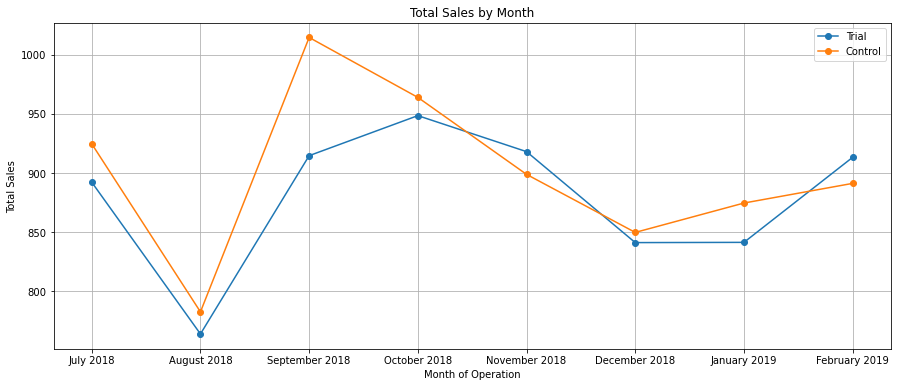

In [47]:
# Extract relevant data
pastSales = measure_over_time.copy()

# Create a new DataFrame with store types
pastSales['Store_type'] = pastSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Calculate the mean total sales by month and store type
pastSales['totSales'] = pastSales.groupby(['YEARMONTH', 'Store_type'])['totSales'].transform('mean')
#pastSales = pastSales[pastSales['Store_type'].isin(['Trial', 'Control'])]
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months before March 2019
pastSales = pastSales[pastSales['TransactionMonth'] < '2019-03-01']
pastSales.loc[:, 'TransactionMonth'] = pastSales['TransactionMonth'].dt.strftime('%B %Y')

# Create a line plot
plt.figure(figsize=(15, 6))
plt.plot(pastSales[pastSales['Store_type'] == 'Trial']['TransactionMonth'], pastSales[pastSales['Store_type'] == 'Trial']['totSales'], label='Trial', marker='o')
plt.plot(pastSales[pastSales['Store_type'] == 'Control']['TransactionMonth'], pastSales[pastSales['Store_type'] == 'Control']['totSales'], label='Control', marker='o')
#plt.plot(pastSales[pastSales['Store_type'] == 'Other stores']['TransactionMonth'], pastSales[pastSales['Store_type'] == 'Other stores']['totSales'], label='Other stores', marker='o')

# Add labels and legend
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.legend()
plt.grid(True)
plt.show()


Great, sales are trending in a similar way.

Next, number of customers

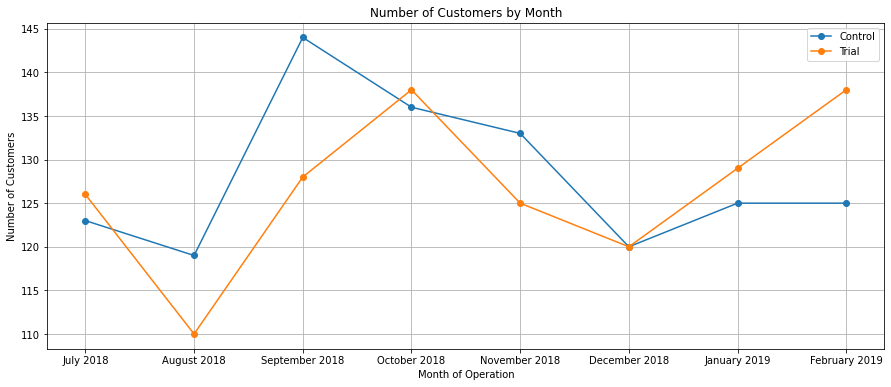

In [51]:
# Extract relevant data
pastCustomers = measure_over_time.copy()
pastCustomers['Store_type'] = pastCustomers['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))
pastCustomers['numberCustomers'] = pastCustomers.groupby(['YEARMONTH', 'Store_type'])['nCustomers'].transform('mean')
pastCustomers = pastCustomers[pastCustomers['Store_type'].isin(['Trial', 'Control','other_stores'])]
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months before March 2019
pastCustomers = pastCustomers[pastCustomers['TransactionMonth'] < '2019-03-01']
pastCustomers.loc[:, 'TransactionMonth'] = pastCustomers['TransactionMonth'].dt.strftime('%B %Y')

# Create a line plot
plt.figure(figsize=(15, 6))
for store_type, group_data in pastCustomers.groupby('Store_type'):
    plt.plot(group_data['TransactionMonth'], group_data['numberCustomers'], label=store_type, marker='o')

# Add labels and legend
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Month')
plt.legend()
plt.grid(True)
plt.show()


Good, the trend in number of customers is also similar.

Let's now assess the impact of the trial on sales.

In [53]:
# Assuming you have already defined trial_store and control_store
trial_store = 86
control_store = 155

# Calculate the scaling factor for control store sales
trial_store_sales = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum()
control_store_sales = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum()

scalingFactorForControlSales = trial_store_sales / control_store_sales

# Apply the scaling factor
measure_over_time_sales = measure_over_time
scaledControlSales = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactorForControlSales

#  Calculate the percentage difference between scaled control sales and trial sales
percentageDifference = pd.merge(scaledControlSales[['YEARMONTH', 'controlSales']],measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == trial_store][['YEARMONTH', 'totSales']], on='YEARMONTH')

# Calculate the percentage difference
percentageDifference['percentageDiff'] = abs(percentageDifference['controlSales'] -percentageDifference['totSales']) / percentageDifference['controlSales']

percentageDifference.head()

# Filter the percentageDiff DataFrame for the pre-trial period
pre_trial_period_df = percentageDifference[['percentageDiff','YEARMONTH']]
pre_trial_percentage_diffr = pre_trial_period_df[pre_trial_period_df['YEARMONTH'] < 201902]

# Calculate the standard deviation
std_dev = np.std(pre_trial_percentage_diffr['percentageDiff'])
std_dev

from scipy.stats import t

# Calculate the standard deviation based on the scaled percentage difference in the pre-trial period
std_dev = np.std(percentageDifference[percentageDifference['YEARMONTH'] < 201902]['percentageDiff'])

# Degrees of freedom (number of months in the pre-trial period - 1)
degrees_of_freedom = 7

# Calculate the t-values for the trial months
percentageDifference['tValue'] = (percentageDifference['percentageDiff'] - 0) / std_dev
percentageDifference['TransactionMonth'] = pd.to_datetime(percentageDifference['YEARMONTH'].astype(str), format='%Y%m')

# Filter for the trial months
trial_months = percentageDifference[(percentageDifference['YEARMONTH'] < 201905) & (percentageDifference['YEARMONTH'] > 201901)]

# Find the 95th percentile of the t-distribution
alpha = 0.05  # Significance level
t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

print("Critical t-value for a 95% confidence interval:", t_critical)
print(trial_months[['TransactionMonth', 'tValue']])

Critical t-value for a 95% confidence interval: 2.3646242510102993
  TransactionMonth     tValue
7       2019-02-01   2.354174
8       2019-03-01  13.206585
9       2019-04-01   1.473915


We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March only - i.e. the increase in sales in the trial store 86 in March is statistically greater than in the control store.

#### Calculate the 5th and 95th percentile for control store sales

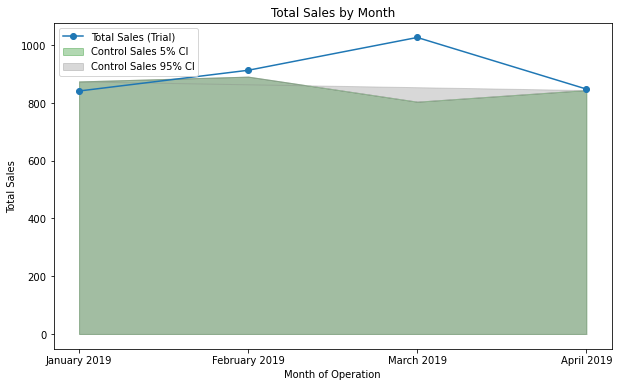

In [57]:
# Create a new column Store_type
measure_over_time['Store_type'] = 'Other stores'
measure_over_time.loc[measure_over_time['STORE_NBR'] == trial_store, 'Store_type'] = 'Trial'
measure_over_time.loc[measure_over_time['STORE_NBR'] == control_store, 'Store_type'] = 'Control'

# Calculate mean total sales by YEARMONTH and Store_type
pastSales = measure_over_time[measure_over_time['Store_type'].isin(['Trial', 'Control'])]
pastSales = pastSales.groupby(['YEARMONTH', 'Store_type'])['totSales'].mean().reset_index()

# Convert YEARMONTH to TransactionMonth
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'], format='%Y%m')

std_dev = np.std(percentageDifference[percentageDifference['YEARMONTH'] < 201902]['percentageDiff'])
# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Update 'Store_type' for 95th and 5th percentiles
pastSales.loc[pastSales['Store_type'] == 'Control', 'Store_type'] = 'Control 95th % confidence interval'
pastSales.loc[pastSales['Store_type'] == 'Control 5th % confidence interval', 'Store_type'] = 'Control 5th % confidence interval'

# Concatenate the DataFrames
trial86Assessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5], ignore_index=True)

# Filter the data for the specified date range
trial86Assessment = trial86Assessment[(trial86Assessment['TransactionMonth'] >= '2019-01-01') & (trial86Assessment['TransactionMonth'] < '2019-05-01')]

# Convert TransactionMonth to "Month Year" format
trial86Assessment.loc[:, 'TransactionMonth'] = trial86Assessment['TransactionMonth'].dt.strftime('%B %Y')

#Create a plot
plt.figure(figsize=(10, 6))
#plt.plot(filtered_data['TransactionMonth'], filtered_data['totSales'], label='Total Sales', marker='o')
for store_type, data in trial86Assessment.groupby('Store_type'):
    if store_type == 'Trial':
        plt.plot(data['TransactionMonth'], data['totSales'], marker='o', label='Total Sales (Trial)')
    elif store_type == 'Control':
        plt.plot(data['TransactionMonth'], data['totSales'], marker='o', label='Total Sales (Control)')
    elif store_type == 'Control 95th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['totSales'], alpha=0.3, color='gray', label='Control Sales 95% CI')
    elif store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['totSales'], alpha=0.3, color='green', label='Control Sales 5% CI')
    else:
        plt.plot(data['TransactionMonth'], data['totSales'], label=f'Total Sales ({store_type})')

plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.legend()
plt.show()

The results show that the trial in store 86 is not significantly different to its control store in the trial period as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the three trial months.

#### Let's have a look at assessing this for the number of customers as well.

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


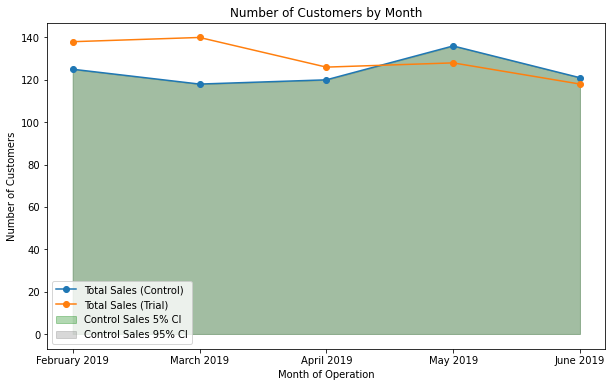

In [65]:
# Assuming you have already defined trial_store and control_store
trial_store = 86
control_store = 155

# Calculate the scaling factor for control store sales
trial_store_cust = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['nCustomers'].sum()
control_store_cust = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['nCustomers'].sum()

scalingFactorForControlCust = trial_store_cust / control_store_cust

# Apply the scaling factor
measure_over_time_custs = measure_over_time
measure_over_time_custs['scaledControlCustomers'] = measure_over_time_custs['nCustomers'] * scalingFactorForControlCust

# Calculate the percentage difference between scaled control store customers and trial customers
measure_over_time_custs['percentageDiff'] = abs(measure_over_time_custs['scaledControlCustomers'] - measure_over_time_custs['nCustomers']) / measure_over_time_custs['scaledControlCustomers']

# Standard deviation based on the scaled percentage difference in the pre-trial period
stdDev = measure_over_time_custs[measure_over_time_custs['YEARMONTH'] < 201902]['percentageDiff'].std()

# Degrees of freedom
degreesOfFreedom = 7

# Trial and control store number of customers
pastCustomers = measure_over_time_custs[measure_over_time_custs['Store_type'].isin(['Trial', 'Control'])]
pastCustomers = pastCustomers.groupby(['YEARMONTH', 'Store_type'])['nCustomers'].mean().reset_index()

pastCustomers['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'], format='%Y%m')

# Control store 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCustomers'] = pastCustomers_Controls95['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCustomers'] = pastCustomers_Controls5['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Concatenate the DataFrames
trialC86Assessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5], ignore_index=True)
#trialC86Assessment['YEARMONTH'] = trialC86Assessment['YEARMONTH'].astype(int)
trialC86Assessment['TransactionMonth'] = pd.to_datetime(trialC86Assessment['YEARMONTH'], format='%Y%m')

# Filter the data for the specified date range
filtered_Cus86_data = trialC86Assessment[(trialC86Assessment['TransactionMonth'] >= '2019-02-01')] 
                                    
filtered_Cus86_data.loc[:, 'TransactionMonth'] = filtered_Cus86_data['TransactionMonth'].dt.strftime('%B %Y')

#Create a plot
plt.figure(figsize=(10, 6))
for store_type, data in filtered_Cus86_data.groupby('Store_type'):
    if store_type == 'Trial':
        plt.plot(data['TransactionMonth'], data['nCustomers'], marker='o', label='Total Sales (Trial)')
    elif store_type == 'Control':
        plt.plot(data['TransactionMonth'], data['nCustomers'], marker='o', label='Total Sales (Control)')
    elif store_type == 'Control 95th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['nCustomers'], alpha=0.3, color='gray', label='Control Sales 95% CI')
    elif store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['nCustomers'], alpha=0.3, color='green', label='Control Sales 5% CI')
    else:
        plt.plot(data['TransactionMonth'], data['nCustomers'], label=f'Total Sales ({store_type})')

plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Month')
plt.legend()
plt.show()

It looks like the number of customers is significantly higher in all of the three months. This seems to suggest that the trial had a significant impact on increasing
the number of customers in trial store 86 but as we saw, sales were not significantly higher.

## Trial store 88

#### Use the functions from earlier to calculate the correlation of the sales and number of customers of each potential control store to the trial store
#### Use the functions from earlier to calculate the magnitude distance of the sales and number of customers of each potential control store to the trial store
#### Create a combined score composed of correlation and magnitude by merging the correlations table and the magnitudes table, for each driver.


In [68]:
from scipy.stats import pearsonr

# Function to calculate correlation
def calculate_correlation(input_table, metric_col, store_comparison):
    calc_corr_table = pd.DataFrame(columns=['Store1', 'Store2', 'corr_measure'])
    store_numbers = input_table['STORE_NBR'].unique()

    for i in store_numbers:
        if i != store_comparison:
            trial_store_data = input_table[input_table['STORE_NBR'] == store_comparison][metric_col]
            control_store_data = input_table[input_table['STORE_NBR'] == i][metric_col]
            corr_measure, _ = pearsonr(trial_store_data, control_store_data)
            calculated_measure = pd.DataFrame({'trial_store_data': [store_comparison], 'control_store_data': [i], 'corr_measure': [corr_measure]})
            calculated_measure['Store1'] = [store_comparison]
            calculated_measure['Store2'] = [i]
            calculated_measure['corr_measure'] = [corr_measure]
            calc_corr_table = pd.concat([calc_corr_table, calculated_measure])

    return calc_corr_table


# Function to calculate magnitude distance
def calculate_magnitude_distance(input_table, metric_col, store_comparison):
    magnitude_table = pd.DataFrame(columns=["Store1", "Store2", "YEARMONTH", "magnitude_measure"])
    store_numbers = input_table["STORE_NBR"].unique()
    
    for i in store_numbers:
        magnitude_measure = pd.DataFrame({
            "Store1": [store_comparison],
            "Store2": [i],
            "YEARMONTH": input_table[input_table["STORE_NBR"] == store_comparison]["YEARMONTH"].values[0],
            "magnitude_measure": abs(input_table[(input_table["STORE_NBR"] == store_comparison)][metric_col].values[0]
                            - input_table[input_table["STORE_NBR"] == i][metric_col].values[0])
        })
        magnitude_table = pd.concat([magnitude_table, magnitude_measure], ignore_index=True)
    
    # Standardize the magnitude distance
    min_max_dist = magnitude_table.groupby(["Store1", "YEARMONTH"])["magnitude_measure"].agg(["min", "max"]).reset_index()
    dist_table = magnitude_table.merge(min_max_dist, on=["Store1", "YEARMONTH"])
    dist_table["magnitudeMeasure"] = 1 - (dist_table["magnitude_measure"] - dist_table["min"]) / (dist_table["max"] - dist_table["min"])
    
    final_dist_table = dist_table.groupby(["Store1", "Store2"])["magnitudeMeasure"].mean().reset_index()
    final_dist_table.rename(columns={"magnitudeMeasure": "mag_measure"}, inplace=True)
    
    return final_dist_table

# Trial store and metric column
trial_store = 88
metric_col_sales = 'totSales'
metric_col_customers = 'nCustomers'

# Calculate correlations for total sales and number of customers
corr_nSales = calculate_correlation(pre_trial_measures, metric_col_sales, trial_store)
corr_nCustomers = calculate_correlation(pre_trial_measures, metric_col_customers, trial_store)

# Calculate magnitude distances for total sales and number of customers
magnitude_nSales = calculate_magnitude_distance(pre_trial_measures, metric_col_sales, trial_store)
magnitude_nCustomers = calculate_magnitude_distance(pre_trial_measures, metric_col_customers, trial_store)

# Display the resulting DataFrames
print("Correlation for Total Sales:")
print(corr_nSales)

print("Correlation for Number of Customers:")
print(corr_nCustomers)

print("Magnitude Distance for Total Sales:")
print(magnitude_nSales)

print("Magnitude Distance for Number of Customers:")
print(magnitude_nCustomers)


Correlation for Total Sales:
   Store1 Store2  corr_measure  trial_store_data  control_store_data
0      88      1      0.813636              88.0                 1.0
0      88      2     -0.067927              88.0                 2.0
0      88      3     -0.507847              88.0                 3.0
0      88      4     -0.745566              88.0                 4.0
0      88      5      0.190330              88.0                 5.0
..    ...    ...           ...               ...                 ...
0      88    268     -0.021429              88.0               268.0
0      88    269     -0.172578              88.0               269.0
0      88    270     -0.723272              88.0               270.0
0      88    271     -0.103037              88.0               271.0
0      88    272     -0.772772              88.0               272.0

[259 rows x 5 columns]
Correlation for Number of Customers:
   Store1 Store2  corr_measure  trial_store_data  control_store_data
0      88    

In [69]:
# Merge correlations and magnitude tables for sales
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'], how='inner')

# Calculate the final score for total sales as the simple average
score_nSales['scoreNSales'] = (score_nSales['corr_measure'] + score_nSales['mag_measure']) / 2

# Merge correlations and magnitude tables for customers
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'], how='inner')

# Calculate the final score for number of customers as the simple average
score_nCustomers['scoreNCust'] = (score_nCustomers['corr_measure'] + score_nCustomers['mag_measure']) / 2

# Sort the scores for total sales in descending order
score_nSales = score_nSales.sort_values(by='scoreNSales', ascending=False)

# Display the sorted scores for total sales
print("Sorted Scores for Total Sales:")
print(score_nSales)

# Sort the scores for number of customers in descending order
score_nCustomers = score_nCustomers.sort_values(by='scoreNCust', ascending=False)

# Display the sorted scores for number of customers
print("Sorted Scores for Number of Customers:")
print(score_nCustomers)

Sorted Scores for Total Sales:
    Store1 Store2  corr_measure  trial_store_data  control_store_data  \
193     88    203      0.508001              88.0               203.0   
169     88    178      0.731857              88.0               178.0   
98      88    106      0.644724              88.0               106.0   
6       88      7      0.649657              88.0                 7.0   
116     88    125      0.624109              88.0               125.0   
..     ...    ...           ...               ...                 ...   
83      88     90     -0.662427              88.0                90.0   
39      88     42     -0.519338              88.0                42.0   
7       88      8     -0.816296              88.0                 8.0   
176     88    185     -0.705768              88.0               185.0   
48      88     52     -0.569312              88.0                52.0   

     mag_measure  scoreNSales  
193     0.966866     0.737434  
169     0.725418     0.72863

In [70]:
# Merge sales and customer scores into a single table
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'], how='inner')

# Calculate the final control store score as a weighted average (0.5 for each score)
score_Control['finalControlScore'] = 0.5 * score_Control['scoreNSales'] + 0.5 * score_Control['scoreNCust']

# Sort the stores by final control score in descending order
score_Control = score_Control.sort_values(by='finalControlScore', ascending=False)

# Display the sorted control store scores
print("Sorted Control Store Scores:")
score_Control.head()


Sorted Control Store Scores:


,Store1,Store2,corr_measure_x,trial_store_data_x,control_store_data_x,mag_measure_x,scoreNSales,corr_measure_y,trial_store_data_y,control_store_data_y,mag_measure_y,scoreNCust,finalControlScore
3,88,7,0.649657,88.0,7.0,0.781178,0.715418,0.946829,88.0,7.0,0.781457,0.864143,0.789780
0,88,203,0.508001,88.0,203.0,0.966866,0.737434,0.573341,88.0,203.0,0.927152,0.750247,0.743840
13,88,123,0.399761,88.0,123.0,0.843074,0.621418,0.906737,88.0,123.0,0.821192,0.863965,0.742691
1,88,178,0.731857,88.0,178.0,0.725418,0.728637,0.609157,88.0,178.0,0.854305,0.731731,0.730184
17,88,237,0.308479,88.0,237.0,0.893849,0.601164,0.723230,88.0,237.0,0.940397,0.831814,0.716489


#### Select control stores based on the highest matching store
#### (closest to 1 but not the store itself, i.e. the second ranked highest store)
#### Select control store for trial store 88

In [81]:
# Filter the scores for the trial store
trial_store_scores = score_Control[score_Control['Store1'] == 88]

# Sort the scores in descending order
trial_store_scores = trial_store_scores.sort_values(by='finalControlScore', ascending=False)

# Select the second highest ranked store (closest to 1 but not the store itself)
control_store = trial_store_scores.iloc[1]['Store2']

# Display the selected control store
print("Selected Control Store:", control_store)


Selected Control Store: 203


We’ve now found store 237 to be a suitable control store for trial store 88. Again, let’s check visually if the
drivers are indeed similar in the period before the trial. We’ll look at total sales first.

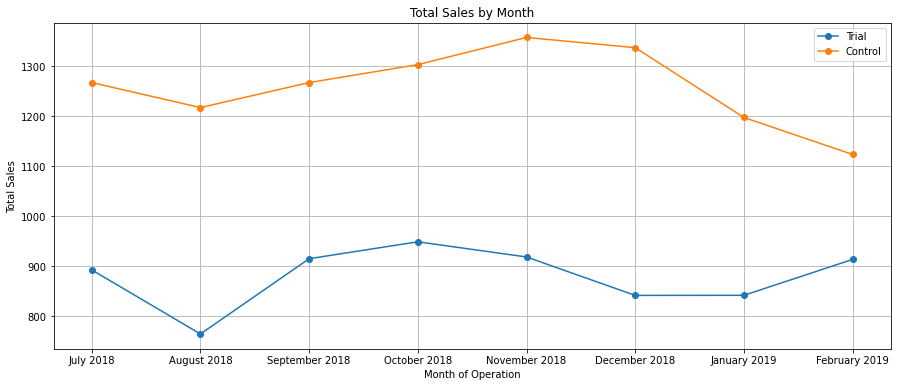

In [82]:
# Extract relevant data
pastSales88 = measure_over_time.copy()

# Create a new DataFrame with store types
pastSales88['Store_type'] = pastSales88['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))

# Calculate the mean total sales by month and store type
pastSales88['totSales'] = pastSales88.groupby(['YEARMONTH', 'Store_type'])['totSales'].transform('mean')
#pastSales = pastSales[pastSales['Store_type'].isin(['Trial', 'Control'])]
pastSales88['TransactionMonth'] = pd.to_datetime(pastSales88['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months before March 2019
pastSales88 = pastSales88[pastSales88['TransactionMonth'] < '2019-03-01']
pastSales88.loc[:, 'TransactionMonth'] = pastSales88['TransactionMonth'].dt.strftime('%B %Y')

# Create a line plot
plt.figure(figsize=(15, 6))
plt.plot(pastSales88[pastSales88['Store_type'] == 'Trial']['TransactionMonth'], pastSales88[pastSales88['Store_type'] == 'Trial']['totSales'], label='Trial', marker='o')
plt.plot(pastSales88[pastSales88['Store_type'] == 'Control']['TransactionMonth'], pastSales88[pastSales88['Store_type'] == 'Control']['totSales'], label='Control', marker='o')
#plt.plot(pastSales[pastSales['Store_type'] == 'Other stores']['TransactionMonth'], pastSales[pastSales['Store_type'] == 'Other stores']['totSales'], label='Other stores', marker='o')

# Add labels and legend
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.legend()
plt.grid(True)
plt.show()


Great, the trial and control stores have similar total sales.

Next, number of customers.

#### Visual checks on trends based on the drivers
#### For the period before the trial, create a graph with customer counts of thetrial store for each month, compared to the control store and other stores

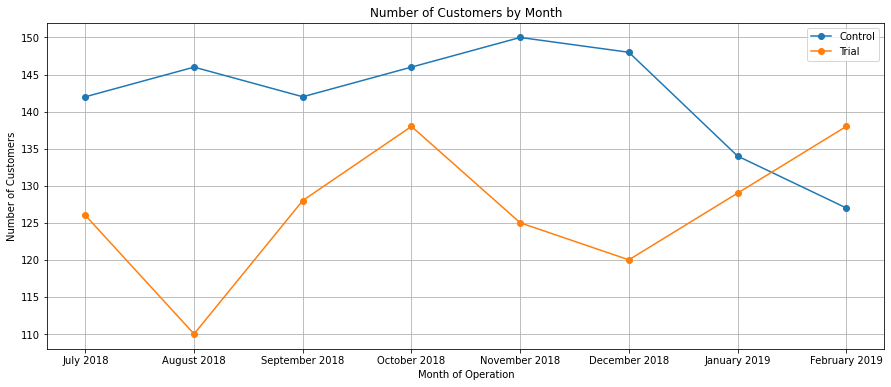

In [83]:
# Extract relevant data
pastCustomers88 = measure_over_time.copy()
pastCustomers88['Store_type'] = pastCustomers88['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))
pastCustomers88['numberCustomers'] = pastCustomers88.groupby(['YEARMONTH', 'Store_type'])['nCustomers'].transform('mean')
pastCustomers88 = pastCustomers88[pastCustomers88['Store_type'].isin(['Trial', 'Control','other_stores'])]
pastCustomers88['TransactionMonth'] = pd.to_datetime(pastCustomers88['YEARMONTH'].astype(str), format='%Y%m')

# Filter data for months before March 2019
pastCustomers88 = pastCustomers88[pastCustomers88['TransactionMonth'] < '2019-03-01']
pastCustomers88.loc[:, 'TransactionMonth'] = pastCustomers88['TransactionMonth'].dt.strftime('%B %Y')

# Create a line plot
plt.figure(figsize=(15, 6))
for store_type, group_data in pastCustomers88.groupby('Store_type'):
    plt.plot(group_data['TransactionMonth'], group_data['numberCustomers'], label=store_type, marker='o')

# Add labels and legend
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Month')
plt.legend()
plt.grid(True)
plt.show()


Total number of customers of the control and trial stores are also similar.

Let's now assess the impact of the trial on sales.

In [88]:
# Assuming you have already defined trial_store and control_store
trial_store = 88
control_store = 237

# Calculate the scaling factor for control store sales
trial_store_sales = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum()
control_store_sales = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['totSales'].sum()

scalingFactorForControlSales = trial_store_sales / control_store_sales

# Apply the scaling factor
measure_over_time_sales = measure_over_time
scaledControlSales = measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactorForControlSales

#  Calculate the percentage difference between scaled control sales and trial sales
percentageDifference = pd.merge(scaledControlSales[['YEARMONTH', 'controlSales']],measure_over_time_sales[measure_over_time_sales['STORE_NBR'] == trial_store][['YEARMONTH', 'totSales']], on='YEARMONTH')

# Calculate the percentage difference
percentageDifference['percentageDiff'] = abs(percentageDifference['controlSales'] -percentageDifference['totSales']) / percentageDifference['controlSales']

percentageDifference.head()

# Filter the percentageDiff DataFrame for the pre-trial period
pre_trial_period_df = percentageDifference[['percentageDiff','YEARMONTH']]
pre_trial_percentage_diffr = pre_trial_period_df[pre_trial_period_df['YEARMONTH'] < 201902]

# Calculate the standard deviation
std_dev = np.std(pre_trial_percentage_diffr['percentageDiff'])
std_dev

from scipy.stats import t

# Calculate the standard deviation based on the scaled percentage difference in the pre-trial period
std_dev = np.std(percentageDifference[percentageDifference['YEARMONTH'] < 201902]['percentageDiff'])

# Degrees of freedom (number of months in the pre-trial period - 1)
degrees_of_freedom = 7

# Calculate the t-values for the trial months
percentageDifference['tValue'] = (percentageDifference['percentageDiff'] - 0) / std_dev
percentageDifference['TransactionMonth'] = pd.to_datetime(percentageDifference['YEARMONTH'].astype(str), format='%Y%m')

# Filter for the trial months
trial_months = percentageDifference[(percentageDifference['YEARMONTH'] < 201905) & (percentageDifference['YEARMONTH'] > 201901)]

# Find the 95th percentile of the t-distribution
alpha = 0.05  # Significance level
t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

print("Critical t-value for a 95% confidence interval:", t_critical)
print(trial_months[['TransactionMonth', 'tValue']])

Critical t-value for a 95% confidence interval: 2.3646242510102993
  TransactionMonth    tValue
7       2019-02-01  0.843868
8       2019-03-01  7.124136
9       2019-04-01  6.230721


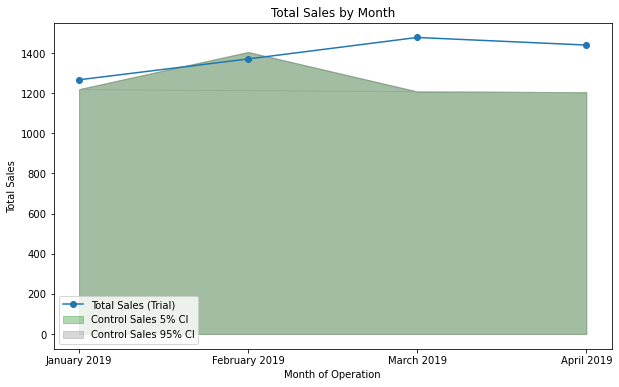

In [89]:
# Create a new column Store_type
measure_over_time['Store_type'] = 'Other stores'
measure_over_time.loc[measure_over_time['STORE_NBR'] == trial_store, 'Store_type'] = 'Trial'
measure_over_time.loc[measure_over_time['STORE_NBR'] == control_store, 'Store_type'] = 'Control'

# Calculate mean total sales by YEARMONTH and Store_type
pastSales = measure_over_time[measure_over_time['Store_type'].isin(['Trial', 'Control'])]
pastSales = pastSales.groupby(['YEARMONTH', 'Store_type'])['totSales'].mean().reset_index()

# Convert YEARMONTH to TransactionMonth
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'], format='%Y%m')

std_dev = np.std(percentageDifference[percentageDifference['YEARMONTH'] < 201902]['percentageDiff'])
# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Update 'Store_type' for 95th and 5th percentiles
pastSales.loc[pastSales['Store_type'] == 'Control', 'Store_type'] = 'Control 95th % confidence interval'
pastSales.loc[pastSales['Store_type'] == 'Control 5th % confidence interval', 'Store_type'] = 'Control 5th % confidence interval'

# Concatenate the DataFrames
trial88Assessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5], ignore_index=True)

# Filter the data for the specified date range
trial88Assessment = trial88Assessment[(trial88Assessment['TransactionMonth'] >= '2019-01-01') & (trial88Assessment['TransactionMonth'] < '2019-05-01')]

# Convert TransactionMonth to "Month Year" format
trial88Assessment.loc[:, 'TransactionMonth'] = trial88Assessment['TransactionMonth'].dt.strftime('%B %Y')

#Create a plot
plt.figure(figsize=(10, 6))
#plt.plot(filtered_data['TransactionMonth'], filtered_data['totSales'], label='Total Sales', marker='o')
for store_type, data in trial88Assessment.groupby('Store_type'):
    if store_type == 'Trial':
        plt.plot(data['TransactionMonth'], data['totSales'], marker='o', label='Total Sales (Trial)')
    elif store_type == 'Control':
        plt.plot(data['TransactionMonth'], data['totSales'], marker='o', label='Total Sales (Control)')
    elif store_type == 'Control 95th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['totSales'], alpha=0.3, color='gray', label='Control Sales 95% CI')
    elif store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['totSales'], alpha=0.3, color='green', label='Control Sales 5% CI')
    else:
        plt.plot(data['TransactionMonth'], data['totSales'], label=f'Total Sales ({store_type})')

plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.legend()
plt.show()

The results show that the trial in store 88 is significantly different to its
control store in the trial period as the trial store performance lies outside of
the 5% to 95% confidence interval of the control store in two of the three trial
months.


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


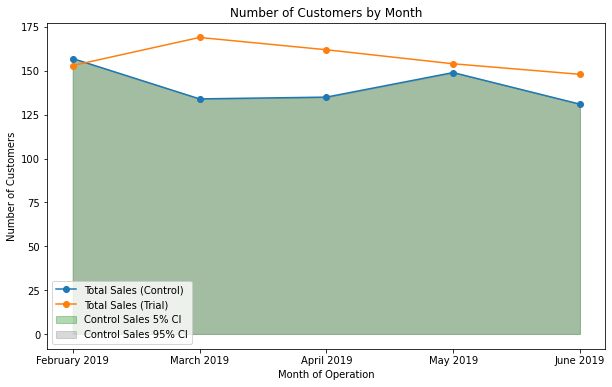

In [92]:
# Assuming you have already defined trial_store and control_store
trial_store = 88
control_store = 237

# Calculate the scaling factor for control store sales
trial_store_cust = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == trial_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['nCustomers'].sum()
control_store_cust = pre_trial_measures[(pre_trial_measures['STORE_NBR'] == control_store) & (pre_trial_measures['YEARMONTH'] < 201902)]['nCustomers'].sum()

scalingFactorForControlCust = trial_store_cust / control_store_cust

# Apply the scaling factor
measure_over_time_custs = measure_over_time
measure_over_time_custs['scaledControlCustomers'] = measure_over_time_custs['nCustomers'] * scalingFactorForControlCust

# Calculate the percentage difference between scaled control store customers and trial customers
measure_over_time_custs['percentageDiff'] = abs(measure_over_time_custs['scaledControlCustomers'] - measure_over_time_custs['nCustomers']) / measure_over_time_custs['scaledControlCustomers']

# Standard deviation based on the scaled percentage difference in the pre-trial period
stdDev = measure_over_time_custs[measure_over_time_custs['YEARMONTH'] < 201902]['percentageDiff'].std()

# Degrees of freedom
degreesOfFreedom = 7

# Trial and control store number of customers
pastCustomers = measure_over_time_custs[measure_over_time_custs['Store_type'].isin(['Trial', 'Control'])]
pastCustomers = pastCustomers.groupby(['YEARMONTH', 'Store_type'])['nCustomers'].mean().reset_index()

pastCustomers['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'], format='%Y%m')

# Control store 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCustomers'] = pastCustomers_Controls95['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCustomers'] = pastCustomers_Controls5['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Concatenate the DataFrames
trialC88Assessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5], ignore_index=True)
trialC88Assessment['TransactionMonth'] = pd.to_datetime(trialC88Assessment['YEARMONTH'], format='%Y%m')

# Filter the data for the specified date range
filtered_Cus88_data = trialC88Assessment[(trialC88Assessment['TransactionMonth'] >= '2019-02-01')] 
                                    
filtered_Cus88_data.loc[:, 'TransactionMonth'] = filtered_Cus88_data['TransactionMonth'].dt.strftime('%B %Y')

#Create a plot
plt.figure(figsize=(10, 6))
for store_type, data in filtered_Cus88_data.groupby('Store_type'):
    if store_type == 'Trial':
        plt.plot(data['TransactionMonth'], data['nCustomers'], marker='o', label='Total Sales (Trial)')
    elif store_type == 'Control':
        plt.plot(data['TransactionMonth'], data['nCustomers'], marker='o', label='Total Sales (Control)')
    elif store_type == 'Control 95th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['nCustomers'], alpha=0.3, color='gray', label='Control Sales 95% CI')
    elif store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'], data['nCustomers'], alpha=0.3, color='green', label='Control Sales 5% CI')
    else:
        plt.plot(data['TransactionMonth'], data['nCustomers'], label=f'Total Sales ({store_type})')

plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Month')
plt.legend()
plt.show()

Total number of customers in the trial period for the trial store is significantly
higher than the control store for two out of three months, which indicates a
positive trial effect.

## Conclusion
We've found control stores 233, 155, 237 for trial stores 77, 86 and 88
respectively.
The results for trial stores 77 and 88 during the trial period show a significant
difference in at least two of the three trial months but this is not the case for
trial store 86. We can check with the client if the implementation of the trial was
different in trial store 86 but overall, the trial shows a significant increase in
sales. 